# Лабораторная работа 1
## Задача о падении тела. Построение графиков функции

*Ляпунова Арина Сергеевна, 24.02.2025*

# Задание 1.1. Задача о падении тела

**Описание процесса**. Тело запущено под углом $\alpha$ к горизонту на высоте $h_{start}$ и через время $t=T$ достигает другое тело, расположенное на расстоянии $s_{end}$ и высоте $h_{end}$.

**Предположения**. 
- Тело будем считать материальной точкой массы $m$.
- Движение запущенного тела осуществляется только под действием силы тяжести $$F=m(0,-g)$$, где $m$- масса тела, $g$-— ускорение свободного падения.
- Сопротивлением среды пренебрегаем.

**Данные**.
- Задача рассматривается при следующих значениях параметров: $h_{start}= 1 m$,  $h_{end}= 3 m$, $T = 3 s$, $s_{end}= 5 m$.
- Угол запуска тела $\alpha$ не известен.
- Начальный момент времени движения тела полагаем равным нулю: $t=0$.
- Значение массы тела $m$ не повлияет на функции перемещения тела.

**Задания для выполнения**
- $\color{red}\text{Определите}$ функцию перемещения тела $(s_{x}(t),s_{y}(t))$ под
действием силы тяжести, где $(s_{x}(t)$ и $(s_{y}(t)$ - горизонтальная и вертикальная
составляющая положения тела в момент времени $t$,  соответственно.
- $\color{red}\text{Найдите}$  угол запуска тела  $\alpha$.
- $\color{red}\text{Постройте}$  график траектории движения тела $(s_{x}(t),s_{y}(t))$ для $t \in [0, T]$.

**Выполнение задания 1.1**

## Этап 1. Импортирование модулей

Импортируем модуль ``math`` с математическими функциями из стандартной библиотеки:

In [100]:
import math

Доступ к инструментам модуля осуществляется с применением синтаксиса уточнения ``<имя модуля>.<имя атрибута>`` . Например,


In [102]:
math.sin(math.pi/2)

1.0

Импортируем расширение ``numpy`` и создадим псевдоним ``np`` для доступа к инструментам модуля, не используя имя ``numpy``


In [104]:
import numpy as np

Расширение ``numpy`` основано на работе со структурой данных массив ( ``ndarray`` ). Массив ( ``ndarray`` ) не является встроенным типом данных Python, он является базовым типом расширения ``numpy``.

Импортируем модуль ``pyplot`` из пакета ``matplotlib`` для построения графиков. Для этого примененим синтаксис ``<имя пакета>.<имя модуля в пакете>`` и создадим псевдоним имени модуля ``plt``


In [108]:
import matplotlib.pyplot as plt

Импортируем модуль ``constants`` из пакета расширений ``scipy`` с псевдонимом ``const`` . Модуль ``constants`` предоставляет доступ к значениям физических констант

In [111]:
import scipy.constants as const

Импортируем модуль ``sympy`` для символьных вычислений в Python

In [114]:
import sympy

## Этап 2. Создание переменных

**Переменные** создаются при первом присваивании им значений. Слева от оператора присваивания ( ``=`` ) записывается переменная, справа — выражение, результатом вычисления которого является объект:``переменная = объект`` . Имена переменных рекомендовано задавать в нижнем регистре с использованием знака нижнего подчеркивания для смыслового разделения имени на части, например ``first_variable = 1`` . Объявлять переменные перед их инициализацией не нужно.

После присваивания всякий раз, когда переменная появляется в коде, она заменяется на объект, на который ссылается. Нельзя использовать переменную, которой не присвоено значение.

In [125]:
h_start = 1 # вертикальная составляющая положения тела в момент запуска
h_end = 3.0E+0 # вертикальная составляющая положения тела в конечный момент движения
T = 3.0 # время полета
s_end = 5.0e0  # горизонтальное перемещение тела за время полета

Отобразить значение переменной можно, указав ее имя в ячейке ввода в последней строке или с использованием встроенной функции ``print``

In [128]:
h_start # переменная не отобразится
h_end # переменная отобразится

3.0

In [130]:
print(h_start, h_end)

1 3.0


Определим значение ускорения свободного падения для дальнейших расчетов:

In [133]:
g = const.g
g, const.unit('standard acceleration of gravity')

(9.80665, 'm s^-2')

$\color{red}\text{Hесколько примеров}$  физических констант из модуля ``constants`` пакета расширений ``scipy``: 

``const.c``-скорость света,
``const.h``- постоянная Планка ,
``const.G``- гравитация,
``const.Avogadro``- постоянная Авогадро.


Временной отрезок $[0,T]$ представим в виде последовательности чисел. Cоздадим последовательность равномерно распределенных чисел на отрезке $[0,T]$ с шагом $0.01$ двумя способами: на основе встроенного типа список ( ``list`` ) и на основе массива ( ``ndarray`` ) из расширения ``numpy`` 

In [138]:
step = 0.01
t_list = [0 + i*step for i in range (int(T/0.01))]
t_array = np.arange(0,T,step)

$\color{red}\text{Cпецификации}$ функций ``range`` и ``arange``, примеры: 

Функции ``range`` и ``arange`` используются для генерации последовательностей чисел.

 Функция ``range``  возвращает объект типа range, который является итерируемым объектом, позволяющим перебирать числа последовательно
 


In [375]:
numbers = list(range(5))
print(numbers)

[0, 1, 2, 3, 4]


- ``range`` создаёт итерируемый объект, а не список. 
- Все параметры должны быть целыми числами.

 Функция ``arange`` генерирует равномерную последовательность чисел с заданным шагом. В отличие от ``range``, ``arange`` может принимать плавающие шаги и поддерживает генерацию чисел с плавающей точкой.

In [382]:
np.arange(1, 11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

- ``arange`` возвращает массив ndarray из библиотеки NumPy.
- Может работать с числами с плавающей точкой, позволяя создавать последовательности с плавающим шагом.

In [387]:
arr = np.arange(0, 2*np.pi, 0.5)
print(arr)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]


- ``range`` используется для работы с целыми числами и возвращает итерируемый объект, тогда как ``arange`` возвращает массив ``NumPy`` и поддерживает работу с числами с плавающей точкой.
- ``range`` полезен для простого перебора индексов в циклах, тогда как ``arange`` чаще всего используется в научной и инженерной практике для генерации последовательностей с плавающими шагами.

## Этап 3. Определение функции перемещения и нахождение угла запуска тела

Полагаем, что начало прямоугольной декартовой системы координат соответствует уровню земли. Тогда в начальный момент движения тела $t=0$ имеем,что $$s_{x}(0)=0, s_{y}(0)=h_{start}$$

Для построения функции перемещения $(s_{x}(t), s_{y}(t))$ воспользуемся вторым законом Ньютона $$ma=F$$, где $m$-масса тела, ускорение движения тела **$a$** = $(s''_{x}(t), s''_{y}(t))$ и приложенная сила **$F$**$=m(0,-g)$. . В результате имеем два уравнения, что $$s''_{x}(t)=0,   s''_{y}(t)=-g.$$

На основании уравнений с учетом начальных условий можно записать аналитический вид для функций $s_{x}(t)$ и $s_{y}(t)$
$$s_{x}(t)=s_{x}(0)+\upsilon0_{x}t= 0+\upsilon0_{x}t,$$ $$s_{y}(t)=s_{y}(0)+\upsilon0_{y}t-\frac{g}{2}t^2=h_{start}+ \upsilon0_{y}t-\frac{g}{2}t^2$$
где **v0**$=(\upsilon0_{x},\upsilon0_{y})$ обозначает неизвестную скорость движения тела в начальный момент времени $t=0$.


Из условия задачи имеем,что $s_{x}(T)=s_{end}$. Из этого соотношения находим значение для $\upsilon0_{x}$

In [163]:
v0_x = s_end/T
v0_x

1.6666666666666667

Из условия задачи имеем, что $s_{y}(T) = h_{end}$. Из этого соотношения находим значение для $\upsilon0_{y}$

In [166]:
v0_y=(h_end-h_start+g/2*T**2)/T
v0_y

15.376641666666666

Значение угла запуска тела $\alpha$ определяем из соотношения $\tan\alpha=\frac{\upsilon0_{y}}{\upsilon0_{x}}$

In [178]:
alpha = math.atan(v0_y/v0_x)
alpha, math.degrees(alpha)

(1.462828312588189, 83.81388846354714)

Результирующая функция имеет следующий вид 

In [181]:
f's_x(t) = {v0_x} t'

's_x(t) = 1.6666666666666667 t'

In [183]:
f's_y(t) = {h_start} + {v0_y:.6} t - {g:.6}/2*t\N{superscript two}'

's_y(t) = 1 + 15.3766 t - 9.80665/2*t²'

## Этап 4. Построение графика траектории движения тела

Построение графиков функции осуществляется по координатам точек графика. Для этого нужно создать последовательность значений $x$-координат точек графика функции и последовательность соответствующих значений $y$-координат точек графика функции.

На Этапе 2 было создано две последовательности равномерно распределенных чисел на отрезке $[0,T]$ с шагом $0.01$ для переменной времени $t$


In [191]:
t_list, t_array; #симол; в конце выражения предотвращает вывод результата выполнения

Определим списки чисел, соответствующие горизонтальным и вертикальным составляющим положения тела в моменты времени ``t_list`` с использованием
формул, полученных на Этапе 3:

In [194]:
s_x_list = [v0_x*t for t in t_list]
s_y_list = [h_start+v0_y*t-g*t**2/2 for t in t_list]

Определим массивы чисел, соответствующие горизонтальным и вертикальным составляющим положения тела в момент времени ``t_array``:


In [201]:
s_x_array = v0_x*t_array
s_y_array = h_start+v0_y*t_array-g*t_array**2/2

Арифметические действия $(+ ,- , *,/ ,** )$ с массивами ``ndarray`` выполняются **поэлементно** без использования дополнительного
синтаксиса

Строим график траектории движения тела, используя инструменты модуля ``pyplot`` пакета ``matplotlib`` . Смотрите **Help | Matplotlib Reference**  для справочной информации по используемым функциям: ``figure`` , ``plot`` , ``title`` , ``xlabel`` , ``ylabel`` , ``axis`` , ``xlim`` , ``ylim``.

(0.0, 5.0, 0.0, 14.0)

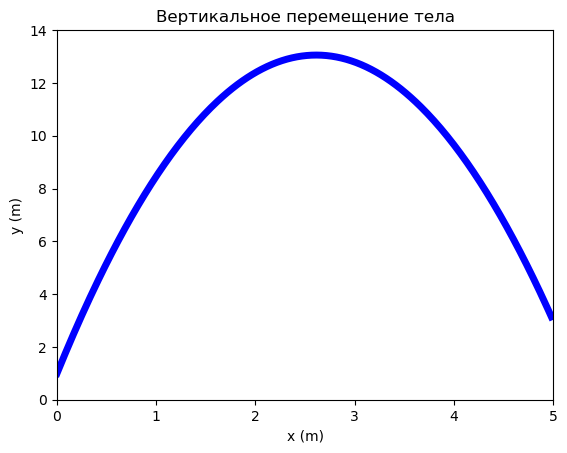

In [204]:
plt.figure()
plt.plot(s_x_list,s_y_list,'b-',lw=5)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)') # символ ; позволяет записывать несколь
plt.axis([0, s_end, 0, h_end+11])

При вызове функции ``plot`` из ``pyplot`` можно использовать как списки, так и массивы.

(0.0, 14.0)

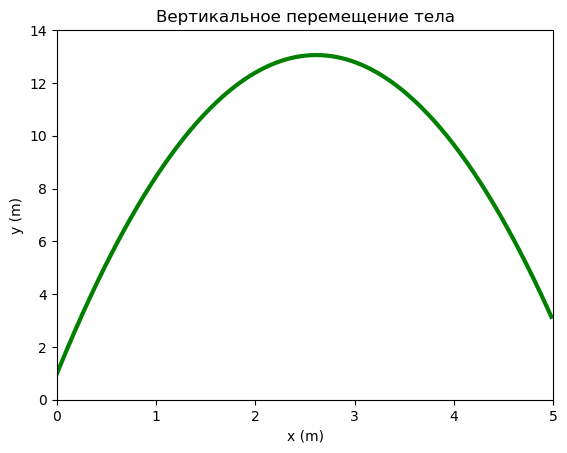

In [207]:
plt.figure()
plt.plot(s_x_array,s_y_array,color='green',lw=3)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)')
# альтернативный синтаксис для установки пределов по осям
plt.xlim(0, s_end)
plt.ylim(0, h_end+11)

## Задание 1.2. Определение момента времени касания телом земли

Для задачи о падении тела из Задания 1.1 $\color{red}\text{найдите}$ момент времени касания телом
земли (время нахождения тела в воздухе).

Выполнение задания осуществите на основе двух подходов.

*Подход 1* **(точное решение)**: время касания телом земли находим как точное
решение уравнения $s_{y}(t)=0$;

*Подход 2* **(приближенное решение)**
- Постройте последовательность $s_{y}$ на временном отрезке $[0, t_{stop}]$,чтобы
момент касания тела земли $t^*$ попадал в выбранный отрезок , т.е $t^* \in [0,t_{stop}]$. Отметим , что $t_{stop}>T$, где значение $T$ задается в Задании 1.1.
- Найдите в построенной последовательности $s_{y}$ два соседних элемента последовательности, значения которых меняют знак. Т. е. найдите значение
индекса $k$ , для которого $s_{y}[k]s_{y}[k+1]<0$. . Это будет означать, что $0 \in (s_{y}[k],s_{y}[k+1])$.
- Постройте прямую линию $s_{lin}(t)$, проходящую через две точки $(t[k],s_{y}[k])$ и $(t[k+1],s_{y}[k+1])$ и найдите значение $t^* \in (t[k],t[k+1])$ из условия $s_{lin}(t^*)=0$.  Найденное значение $t^*$ будет соответствовать точке $(t^*,0)$ на прямой $s_{lin}(t)$.$\color{red}\text{Приведите}$ в документе формулы для прямой $s_{lin}(t)$ и для вычисления $t^*$.
  
$\color{red}\text{Сравните}$ точное решение *(Подход 1)* и приближенное решение *(Подход 2)*, вычислив относительную ошибку.

  

## Выполнение задания 1.2


Для решения алгебраического уравнения $s_{y}(t)=0$ воспользуемся функцией ``solve`` из модуля ``sympy`` , которая предназначена для решения алгебраических уравнений и систем уравнений. Для выполнения функции ``solve`` предварительно с помощью функции ``symbols`` необходимо создать **символьную переменную**, относительно которой будет определено уравнение.


In [392]:
t = sympy.symbols('t')
result = sympy.solve(h_start+v0_y*t-g*t**2/2, t)
result

[-0.0637382309488101, 3.19970039267921]

In [394]:
t_star_exact = result[-1]
t_star_exact

3.19970039267921

$\color{red}\text{Cпецификации}$ функций ``symbols`` и ``solve`` из модуля ``sympy``:

Функция ``symbols`` используется для объявления символических переменных, которые будут использованы в дальнейших символьных вычислениях.

 Функция ``solve`` используется для решения алгебраических уравнений и систем уравнений.
 
Пример: $ax^2 +bx+c=0$


In [401]:
from sympy import symbols, Eq, solve

x = symbols('x')
a, b, c = 1, -3, 2
n = Eq(a*x**2 + b*x + c, 0)

solution = solve(n, x)
print(solution) 

[1, 2]


In [446]:
t_list = np.arange(0, 1.5 * T, step)

s_y = h_start + v0_y * t_list - 0.5 * g * t_list**2

idx = np.argmax(s_y < 0)  #индекс первого отрицательного значения
if idx == 0:
    print("Тело не достигло земли за данный период.")
else:
    x1 = t_list[idx - 1]
    x2 = t_list[idx]
    y1 = s_y[idx - 1]
    y2 = s_y[idx]

   
    k = (y2 - y1) / (x2 - x1)
    b = y1 - k * x1
    t_zero = -b / k

    print("Приближенное значение: ",end=" ")
print(t_zero)
print("Разница между точным и приближенным значением: ", end=" ")
print(t_star_exact - t_zero)

Приближенное значение:  3.1996994995400283
Разница между точным и приближенным значением:  8.93139179058977e-7


## Задание 1.3. Построение секущей, касательной и нормали к графику функции

$\color{red}\text{Постройте}$ в одной графической области:
- график траектории движения тела $(s_{x}(t),s_{y}(t))$ для  $t \in [0, T]$ из Задания 1.1;
- график секущей прямой к траектории движения тела, проходящей через начальную точку при $t=0$ и конечную точку при $t=T$;
- график касательной прямой к траектории движения тела в начальной точке при  $t=0$;
- график нормальной прямой к траектории движения тела в начальной точке при  $t=0$.

  Построение графиков функций осуществляется по координатам точек графика. Для построения графиков прямых линий (секущая, касательная, нормаль) используйте только две точки.



# Выполнение Задания 1.3

Воспользуемся *векторно-параметрическим* уравнением прямой для заданной точки $p_{start}$ , лежащей на прямой, и заданного направляющего вектора $a$  $$p(t)= p_{start}+at$$.
Направляющий вектор можно определить как $a = p_{end}-p_{start}$, где точка  $p_{end}$ лежит на прямой и отлична от точки $p_{start}$.


Введем новые переменные для описания начальной точки и конечной точки через их координаты. Для новых переменных используем тип массив (``ndarray`` ) из ``numpy`` . 

In [408]:
p_start = np.array([s_x_array[0],s_y_array[0]])
p_end = np.array([s_x_array[-1],s_y_array[-1]])
p_start, p_end

(array([0., 1.]), array([4.98333333, 3.13994275]))

Вычислим направляющий вектор:

In [410]:
a = p_end-p_start

Для построения графика прямой достаточно задания двух точек, лежащих на прямой:


In [413]:
p = [p_start + a*t for t in [-1, 2]]
p = np.array(p)

Построим график траектории движения тела и график секущей прямой в одной графической области:


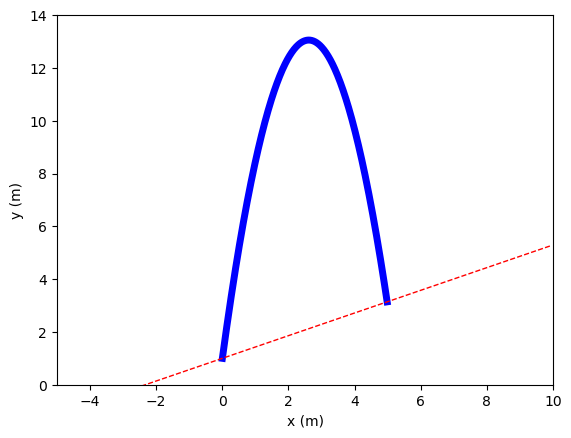

In [ ]:
fig = plt.figure()
plt.plot(s_x_array,s_y_array,'b-',lw=5)
plt.plot(p[:,0],p[:,1],'--',color='red',lw=1) 
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.axis([-5, s_end+5, 0, h_end+11])

Угловой коэффициент $k$ вычисляется по формуле $$ y = k(x-x_{start})+y_{start}$$

In [453]:
s_x_array[0]
k=v0_y-g*t_array[0]
print(k)

15.376641666666666


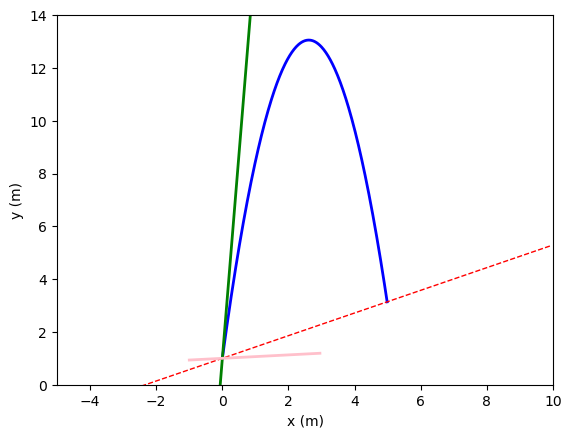

In [461]:
s1_x_array=np.arange(-1,T,0.05)
s1_y_array=k*(s1_x_array-0) + h_start
s2_x_array=np.arange(-1,T,0.05)
s2_y_array=(1/k)*(s1_x_array) + h_start
fig = plt.figure()
plt.plot(s_x_array,s_y_array,'blue',lw=2)# синяя сплошная линия толщиной 2 пикселя, соединяющая точки из массивов s_x_array и s_y_array
plt.plot(p[:,0],p[:,1],'--',color='red',lw=1)# красная пунктирная линия толщиной 1 пиксель, соединяющая точки из массива p. p[:, 0] — это первая колонка массива 
plt.plot(s1_x_array,s1_y_array,color='green',lw=2)
plt.plot(s2_x_array,s2_y_array,color='pink',lw=2)
plt.xlabel('x (m)')
plt.ylabel('y (m)')#Устанавливается подпись осях
plt.axis([-5, s_end+5, 0, h_end+11]);#Устанавливаются границы осей графика. Границы оси X устанавливаются от -5 до s_end + 5, а ось Y — от 0 до h_end + 11

## Задание 1.4. Построение графиков функций

$\color{red}\text{Постройте}$ графики функций на плоскости по координатам точек согласно варианту. Функция задана:

а) полярным уравнением $\rho= \rho(\varphi)$ в полярной системе координат $(\varphi,\rho)$;

б) параметрическими уравнениями $x=x(t), y=y(t)$ в декартовой системе координат $(x,y)$.

Построение графиков функций осуществляется по координатам точек графика. Для этого нужно создать последовательность значений $x(\varphi)$-координат точек графика функции и последовательность соответствующих значений $y(\rho)$ -координат точекграфика функции.


*1) Декартов лист*

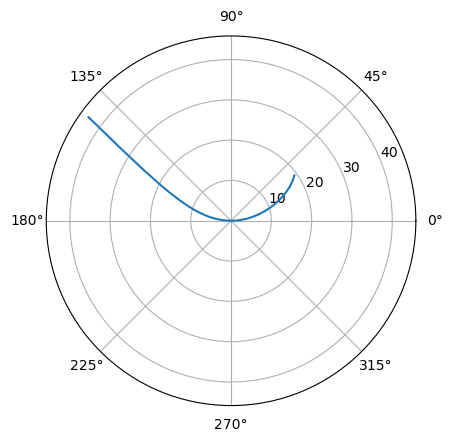

In [229]:
plt.figure()
plt.axes(projection='polar')
phi = np.arange(-np.pi/5, np.pi/5, 0.05)
a=10
r = (3 * a * np.sin(phi) * np.cos(phi)) / (np.sin(phi)**3 + np.cos(phi)**3)
plt.plot(phi + (r < 0) * np.pi, abs(r))

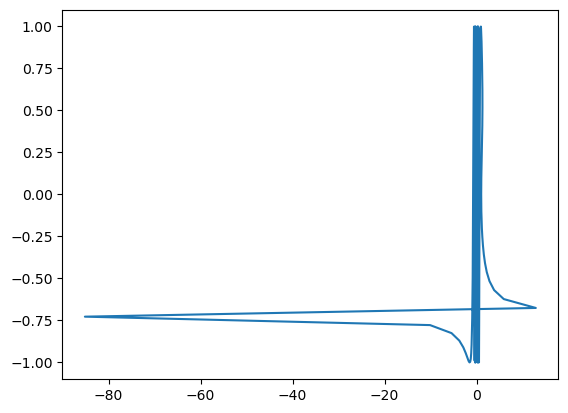

In [232]:

plt.figure()
t = np.arange(-5, 5, 0.05)
x = (3 * t**2 + 1) / (3 * t**3 + 1)
y = np.sin(t**3 / 3 + t)
plt.plot(x, y)

*2)Роза*

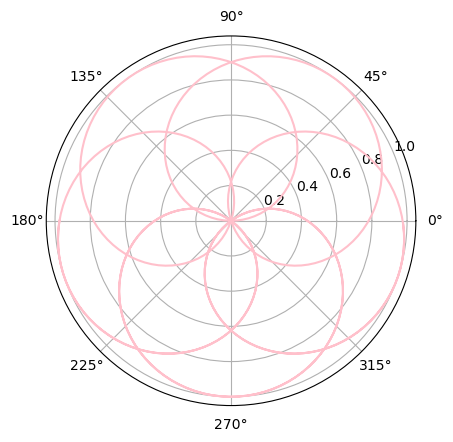

In [247]:
plt.figure()
plt.axes(projection='polar')
phi = np.arange(-5*np.pi, 5*np.pi, 0.05)
a=1
m=5
n=7
r = a * np.sin(m / n * phi)
plt.plot(phi + (r < 0) * np.pi, abs(r), color='pink')

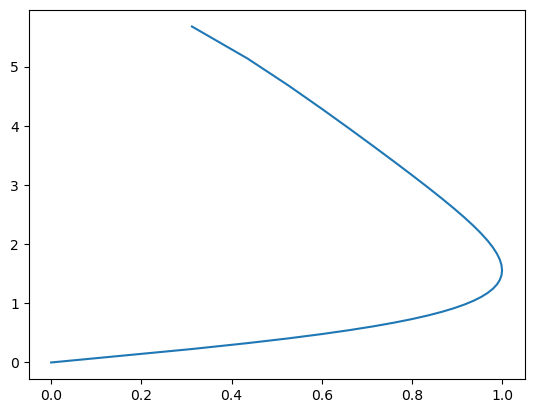

In [261]:
plt.figure()
t = np.arange(-1, 1, 0.05)
x = np.sqrt(1 - t**2)
y = np.tan(np.sqrt(1 + t))
plt.plot(x, y)

*3)Кардиоида*

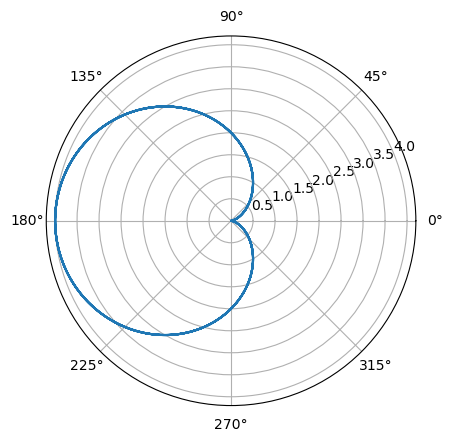

In [264]:
plt.figure()
plt.axes(projection='polar')
phi = np.arange(-5*np.pi, 5*np.pi, 0.05)
a=1
r= 2 * a * (1 - np.cos(phi))
plt.plot(phi + (r < 0) * np.pi, abs(r))


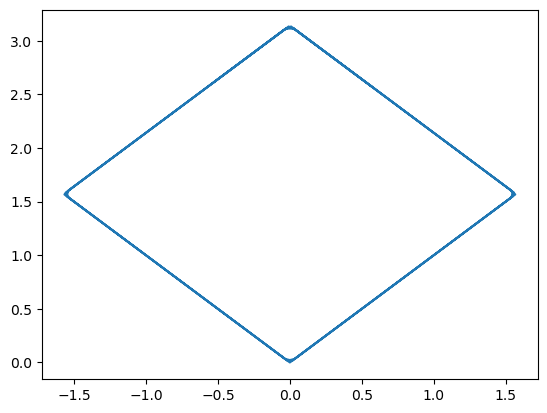

In [270]:
plt.figure()
t = np.arange(-10, 10, 0.05)
x = np.arcsin(np.sin(t))
y = np.arccos(np.cos(t))
plt.plot(x, y)

*4)Роза*

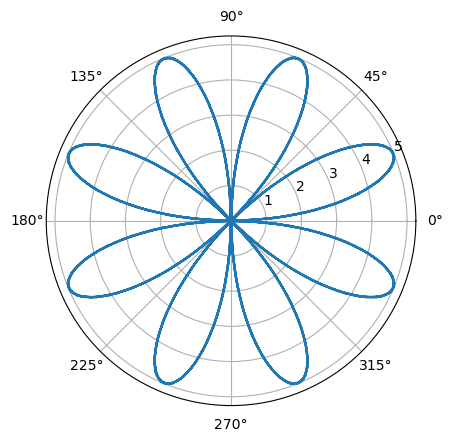

In [273]:
plt.figure()
plt.axes(projection='polar')
phi = np.arange(-5*np.pi, 5*np.pi, 0.05)
a=5
k= 2
r= a * np.sin(2 * k * phi)
plt.plot(phi + (r < 0) * np.pi, abs(r))

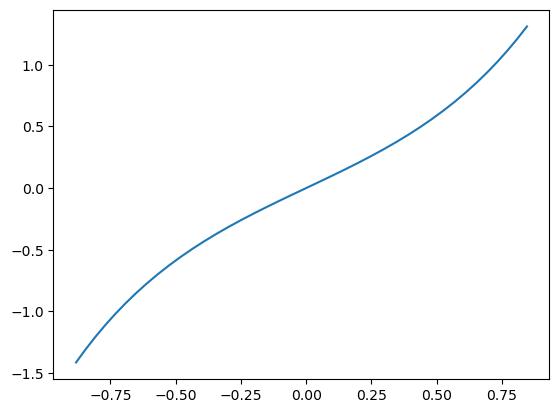

In [275]:
plt.figure()
t = np.arange(-1, 1, 0.05)
x = np.log(t + np.sqrt(t**2 + 1))
y = t * np.sqrt(t**2 + 1)
plt.plot(x,y)


*5) Роза*

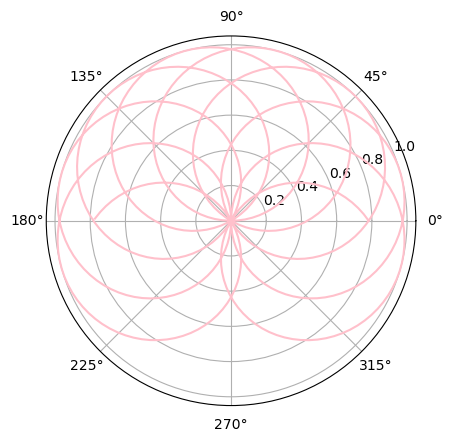

In [278]:
plt.figure()
plt.axes(projection='polar')
phi = np.arange(-5*np.pi, 5*np.pi, 0.05)
a=1
m=6
n=7
r = a * np.sin(m / n * phi)
plt.plot(phi + (r < 0) * np.pi, abs(r), color='pink')

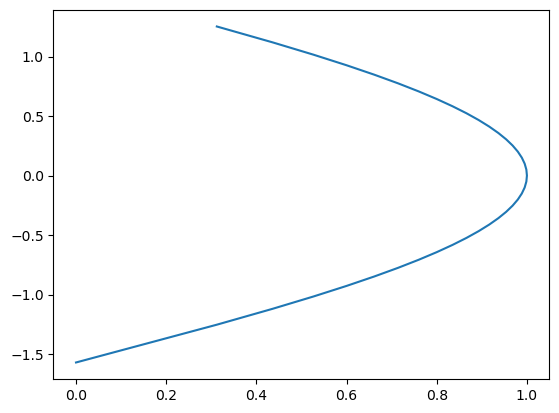

In [282]:
plt.figure()
t = np.arange(0, 2, 0.05)
x = np.sqrt(2 * t - t**2)
y = np.arcsin(t - 1)
plt.plot(x,y)

*6) Улитка Паскаля*

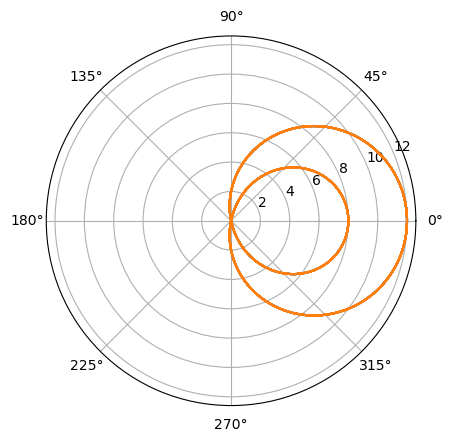

In [291]:
plt.figure()
plt.axes(projection='polar')
phi = np.arange(-5*np.pi, 5*np.pi, 0.05)
a=5
l=2
r1 = 2 * a * np.cos(phi) + l
r2 = 2 * a * np.cos(phi) - l
plt.plot(phi + (r1 < 0) * np.pi, abs(r1))
plt.plot(phi + (r2 < 0) * np.pi, abs(r2))

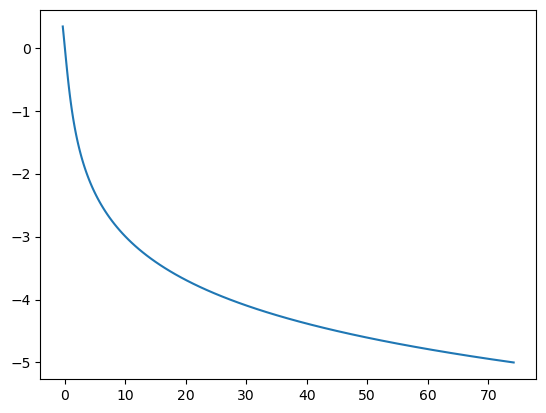

In [305]:
plt.figure()
t = np.arange(-5, 0, 0.05)
x = 1 / np.tan(2 * np.exp(t))
y = np.log(np.tan(np.exp(t)))
plt.plot(x, y)

*7)Конхоида Никомеда*

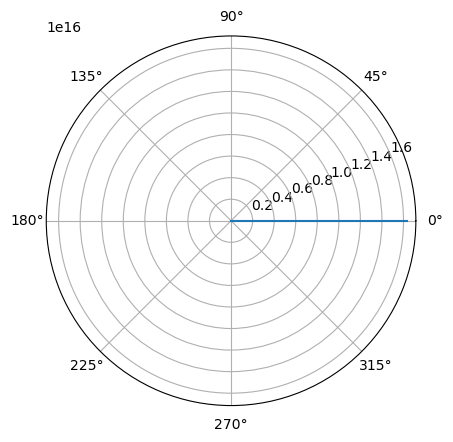

In [322]:
plt.figure()
plt.axes(projection='polar')
phi = np.arange(-5*np.pi, 5*np.pi, 0.05)
a=10
l=7
r = a / np.sin(phi) + l
plt.plot(phi + (r < 0) * np.pi, abs(r)
    )

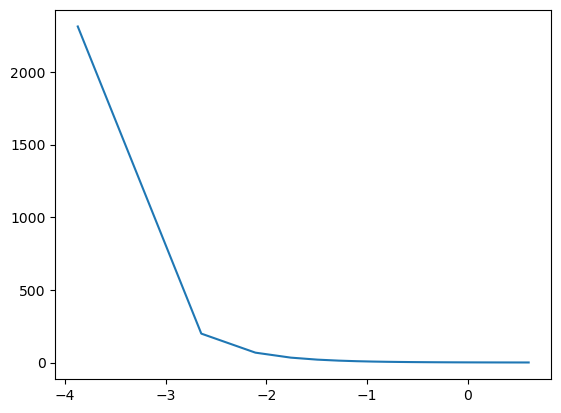

In [344]:
plt.figure()
t = np.arange(0.5, np.pi/2, 0.05)
x = np.log(1 / np.tan(t))
y = 1 / np.cos(t)**2
plt.plot(x, y)

*8) Роза*

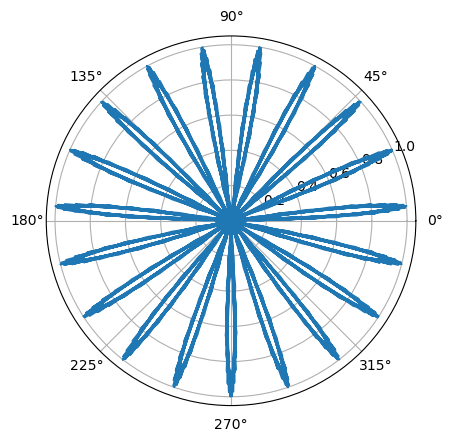

In [355]:
plt.figure()
plt.axes(projection='polar')
phi = np.arange(-5*np.pi, 5*np.pi, 0.05)
a=1
k=9
r= a * np.sin((2 * k + 1) * phi)
plt.plot(phi + (r < 0) * np.pi, abs(r))

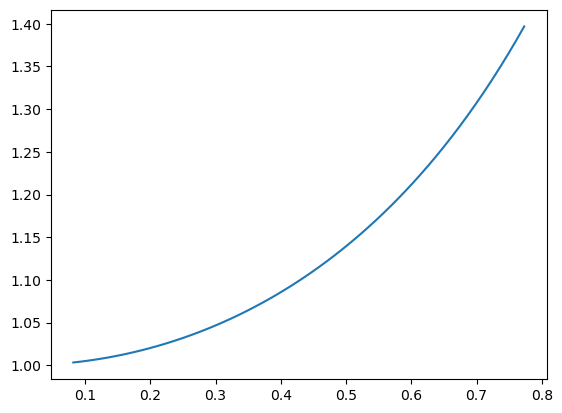

In [357]:
plt.figure()
t = np.arange(-5, 0, 0.05)
x = np.arctan(np.exp(t/2))
y = np.sqrt(np.exp(t) + 1)
plt.plot(x, y)

*9)a)*

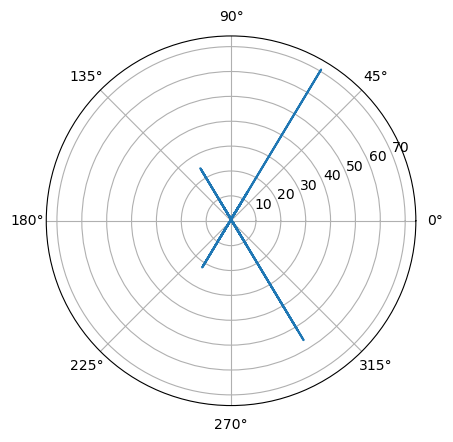

In [360]:
plt.figure()
plt.axes(projection='polar')
phi = np.arange(-5*np.pi, 5*np.pi, 0.05)
a=1
m=6
n=7
r = a / (m + n * np.sin(phi))
plt.plot(phi + (r < 0) * np.pi, abs(r))

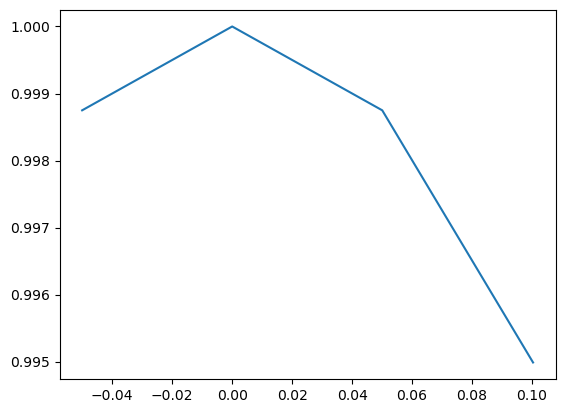

In [366]:
plt.figure()
t = np.arange(-0.1, 0.1, 0.05)
x = np.log(np.sqrt((1 - t) / (1 + t)))
y = np.sqrt(1 - t**2)
plt.plot(x, y)

*10) Cтрофоида*

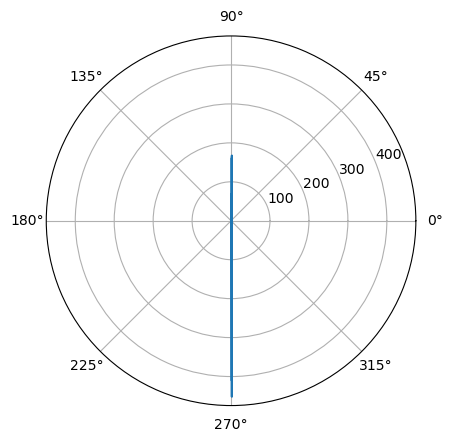

In [369]:
plt.figure()
plt.axes(projection='polar')
phi = np.arange(-5*np.pi, 5*np.pi, 0.05)
a=1
r = a / np.cos(phi) + a * np.tan(phi)
plt.plot(phi + (r < 0) * np.pi, abs(r))

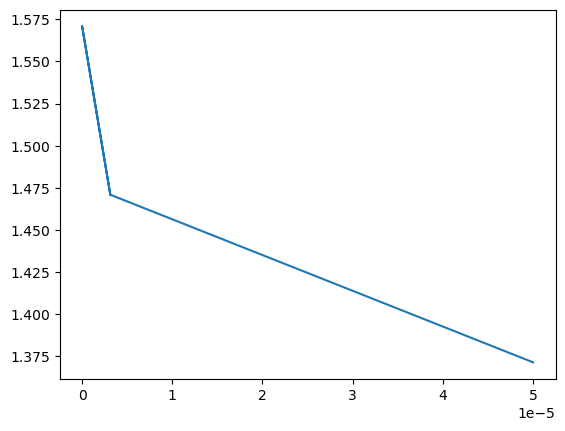

In [371]:
plt.figure()
t = np.arange(-0.1, 0.1, 0.05)
x = np.log(1 / np.sqrt(1 - t**4))
y = np.arcsin((1 - t**2) / (1 + t**2))
plt.plot(x, y)
